# Gráficas con los datos preprocesados

In [1]:
import numpy as np
#np.set_printoptions(threshold='nan')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#Para abrir Explorador de archivos
from tkinter import Tk 
from tkinter.filedialog import askopenfilename
from tkinter import re #operaciones de matching de expresiones regulares

In [2]:
def moving_average(data, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')

def visualize(path1):
    #data import
    data = pd.read_csv(path1).values
    amp = data[1:len(data),1:91]

    #plt
    fig = plt.figure(figsize = (18,15))
    ax1 = plt.subplot(311)
    plt.imshow(amp[:,0:29].T,interpolation = "nearest", aspect = "auto", cmap="jet")
    plt.xlabel("Packet index")
    plt.ylabel("Subcarrier index")
    ax1.set_title("Antenna A")
    plt.colorbar()

    ax2 = plt.subplot(312)
    plt.imshow(amp[:,30:59].T,interpolation = "nearest", aspect = "auto", cmap="jet")
    plt.xlabel("Packet index")
    plt.ylabel("Subcarrier index")
    ax2.set_title("Antenna B")
    plt.colorbar()

    ax3 = plt.subplot(313)
    plt.imshow(amp[:,60:89].T,interpolation = "nearest", aspect = "auto", cmap="jet")
    plt.xlabel("Packet index")
    plt.ylabel("Subcarrier index")
    ax3.set_title("Antenna C")
    plt.colorbar()
    plt.show()
    
    # Initializing valiables
    constant_offset = np.empty_like(amp)
    filtered_data = np.empty_like(amp)

    # Calculating the constant offset (moving average 20 seconds)
    for i in range(1, len(amp[0])):
        constant_offset[:,i] = moving_average(amp[:,i], len(amp[0]))

    # Calculating the filtered data (substract the constant offset)
    filtered_data = amp - constant_offset

    # Smoothing (moving average 0.01 seconds)
    for i in range(1, len(amp[0])):
        filtered_data[:,i] = moving_average(filtered_data[:,i], 10)
    # Calculate correlation matrix (90 * 90 dim)
    cov_mat2 = np.cov(filtered_data.T)
    # Calculate eig_val & eig_vec
    eig_val2, eig_vec2 = np.linalg.eig(cov_mat2)
    # Sort the eig_val & eig_vec
    idx = eig_val2.argsort()[::-1]
    eig_val2 = eig_val2[idx]
    eig_vec2 = eig_vec2[:,idx]
    # Calculate H * eig_vec
    pca_data2 = filtered_data.dot(eig_vec2)
    
    #xmin = 0
    #xmax = 20000
    # plt
    fig3 = plt.figure(figsize = (18,30))

    ax1 = plt.subplot(611)
    plt.plot(pca_data2[:,0])
    plt.xlabel("Time[s]")
    plt.ylabel("Observation values")
    #plt.plot(pca_data2[2500:17500,0])
    ax1.set_title("PCA 1st component")

    ax2 = plt.subplot(612)
    plt.plot(pca_data2[:,1])
    plt.xlabel("Time[s]")
    plt.ylabel("Observation values")
    #plt.plot(pca_data2[2500:17500,1])
    ax2.set_title("PCA 2nd component")

    ax3 = plt.subplot(613)
    plt.plot(pca_data2[:,2])
    plt.xlabel("Time[s]")
    plt.ylabel("Observation values")
    #plt.plot(pca_data2[2500:17500,2])
    ax3.set_title("PCA 3rd component")

    ax4 = plt.subplot(614)
    plt.plot(pca_data2[:,3])
    plt.xlabel("Time[s]")
    plt.ylabel("Observation values")
    #plt.plot(pca_data2[2500:17500,3])
    ax4.set_title("PCA 4th component")

    ax5 = plt.subplot(615)
    plt.plot(pca_data2[:,4])
    plt.xlabel("Time[s]")
    plt.ylabel("Observation values")
    #plt.plot(pca_data2[2500:17500,4])
    ax5.set_title("PCA 5th component")

    ax6 = plt.subplot(616)
    plt.plot(pca_data2[:,5])
    plt.xlabel("Time[s]")
    plt.ylabel("Observation values")
    #plt.plot(pca_data2[2500:17500,5])
    ax6.set_title("PCA 6th component")

    plt.show()
    
    plt.figure(figsize = (18,30))
    # Spectrogram(STFT)
    plt.subplot(611)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,0], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.subplot(612)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,1], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.subplot(613)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,2], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.subplot(614)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,3], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.subplot(615)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,4], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)
    
    plt.subplot(616)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,5], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)
    
    plt.show()
    """
    plt.figure(figsize = (18,10))
    ax = plt.subplot(111)
    ax.magnitude_spectrum(pca_data2[:,0], Fs=1000, scale='dB', color='C1')
    # ax.magnitude_spectrum(pca_data2[5000:7500,0], Fs=1000, color='C1')
    plt.xlim(0,100)
    plt.ylim(0,1000)
    plt.show()
    """
    return [cov_mat2, eig_val2, eig_vec2, pca_data2]

## Se solicita el archivo csv

In [3]:
root = Tk() #Elimina la ventana de Tkinter
root.withdraw() #Ahora se cierra
file_path = askopenfilename() #Se abre el explorador de archivos y se guarda la selección
splitted = file_path.split("/")
file_name = splitted[-1]

In [4]:
#Se añaden los encabezados
csv_headers = "csi_headers.csv"
csv_cols = pd.read_csv(csv_headers)[1:91]
csv_col_list = csv_cols["Column_Names"].tolist()

In [5]:
folder_name = file_path.replace(file_name,'') 

## Nombre del archivo

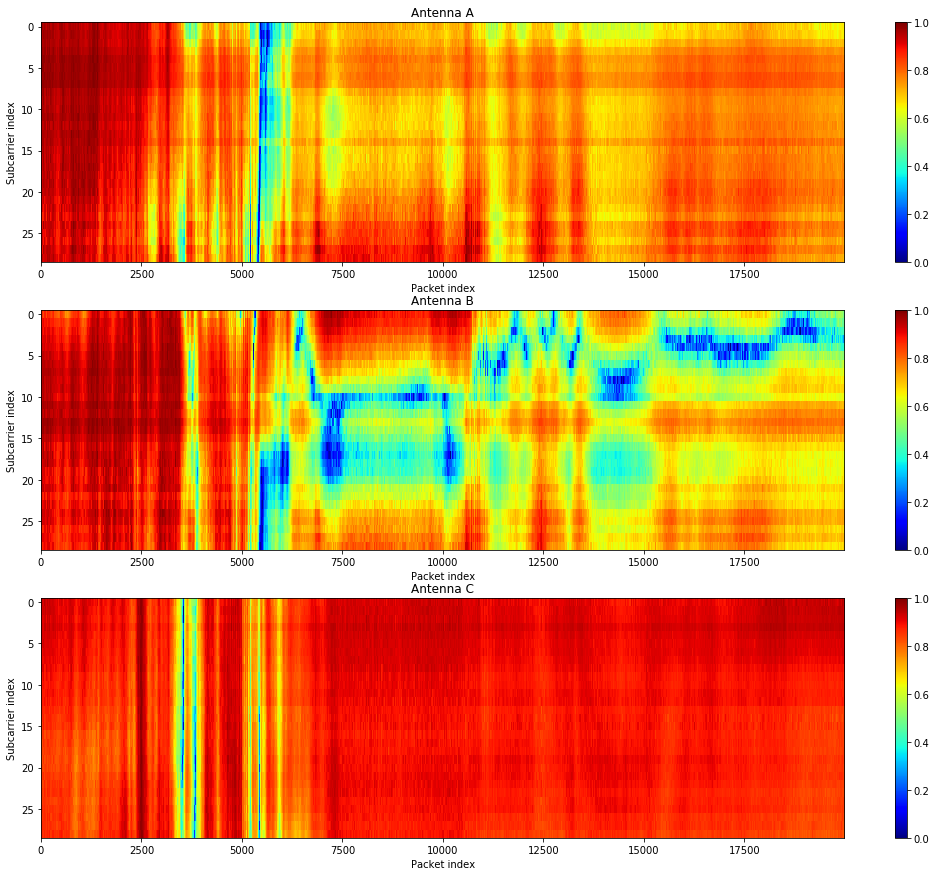

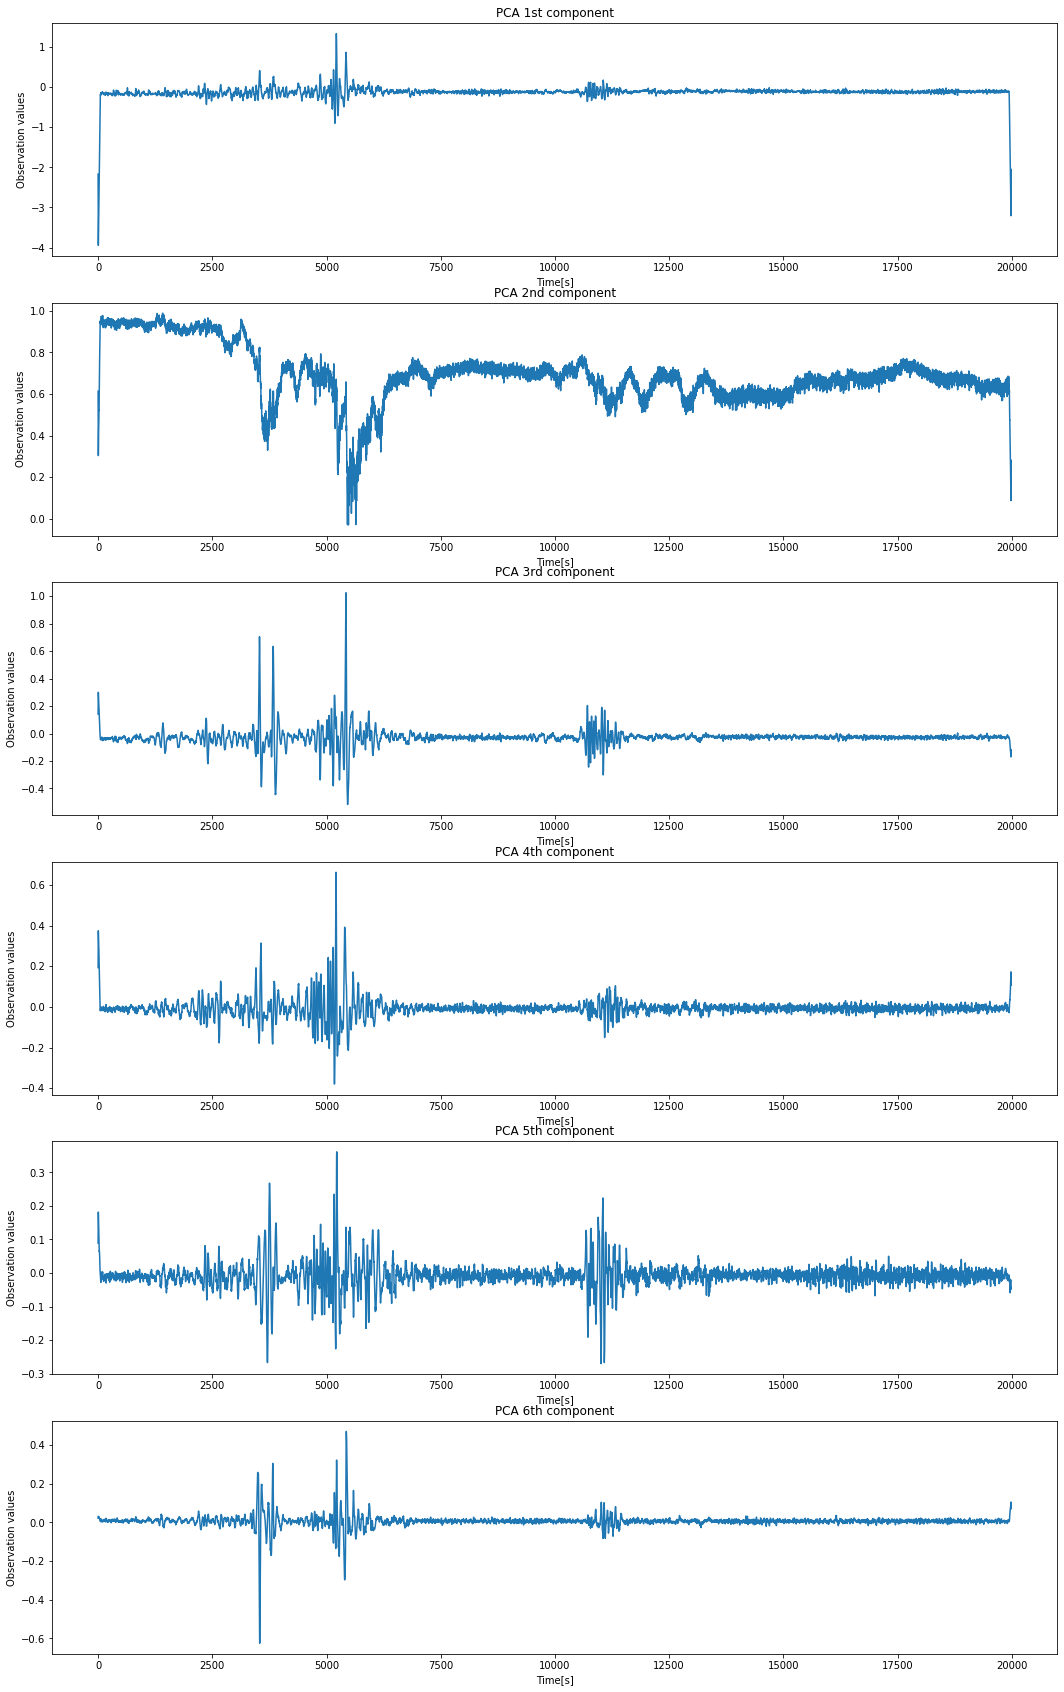

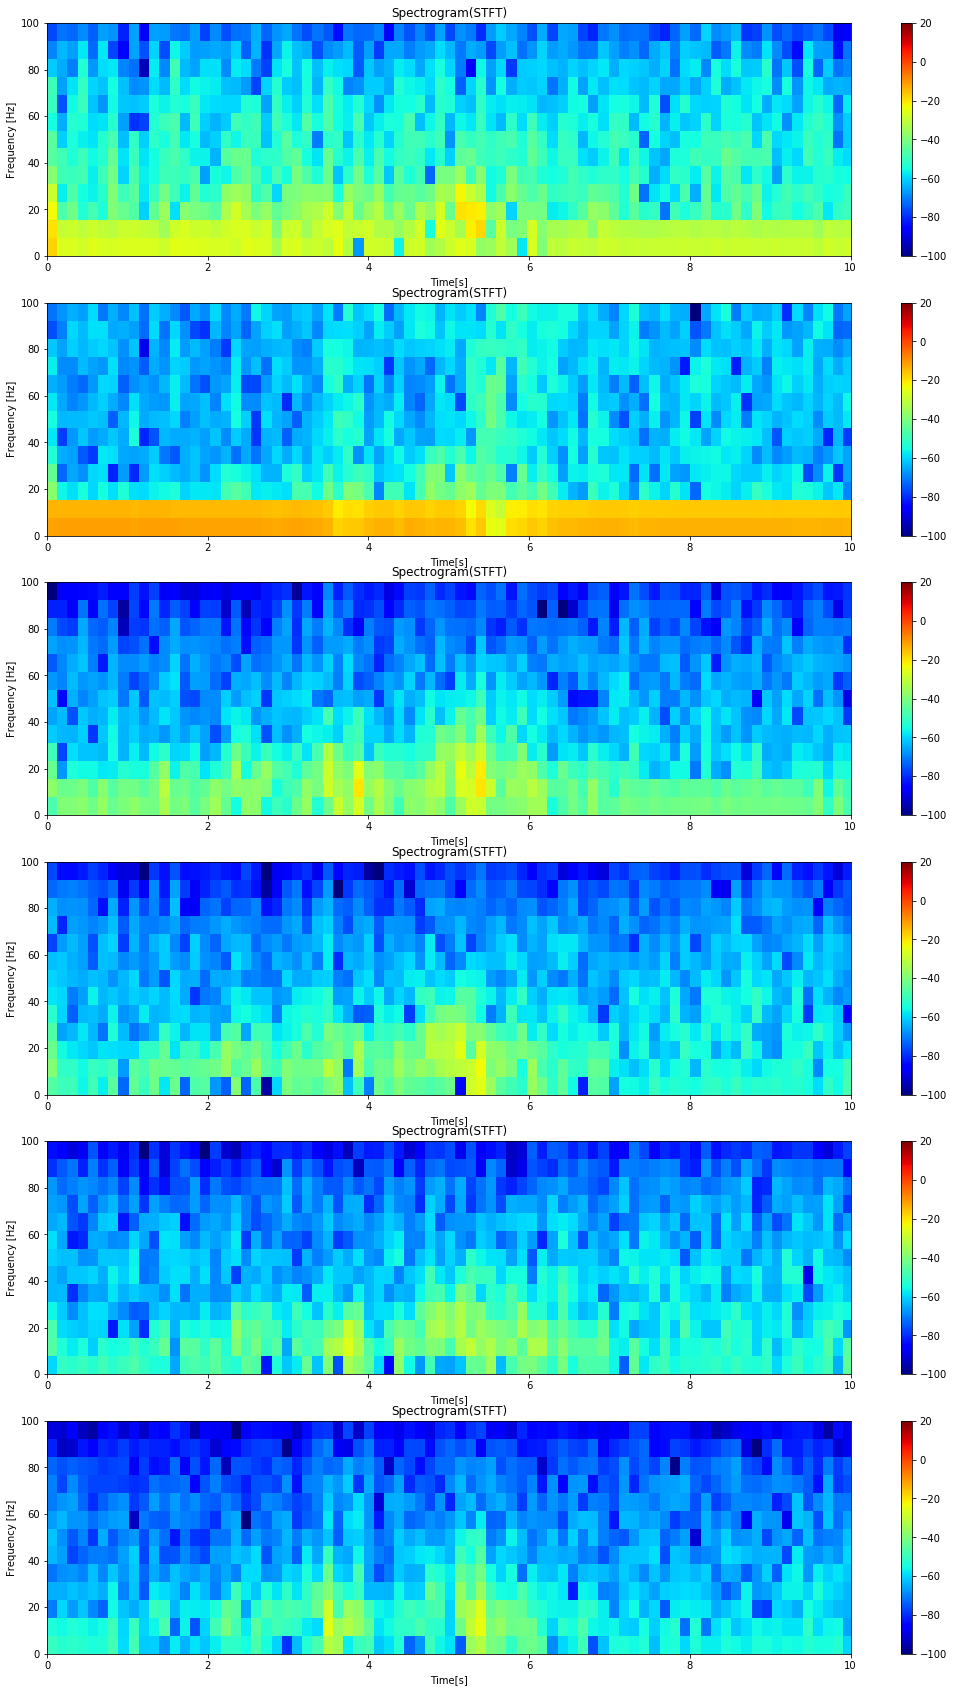

In [6]:
[cov_mat2, eig_val2, eig_vec2, pca_data2]= visualize(path1 = folder_name + "/" + file_name)

In [7]:
pca_data2

array([[-2.17189424e+00,  6.12870955e-01,  1.41504683e-01, ...,
         1.30487512e-03, -8.31796722e-04, -9.30121881e-04],
       [-2.54264916e+00,  5.53312585e-01,  1.74843383e-01, ...,
         6.36218682e-04, -1.19116888e-03, -6.29613848e-04],
       [-2.90541801e+00,  4.90556313e-01,  2.07297493e-01, ...,
        -4.15456402e-04, -1.10293461e-03,  4.27078507e-04],
       ...,
       [-2.64657941e+00,  1.92601766e-01, -1.43541714e-01, ...,
         1.83304945e-03,  2.66547405e-03,  1.30508539e-03],
       [-2.35156859e+00,  2.33817995e-01, -1.30872205e-01, ...,
         2.09228175e-03,  2.73906021e-03,  1.10792955e-03],
       [-2.05343682e+00,  2.80790389e-01, -1.17763369e-01, ...,
         2.44990385e-03,  3.11082979e-03,  9.97453333e-04]])

In [8]:
pcaDataFrame = pd.DataFrame(pca_data2, columns=csv_col_list)

In [9]:
pcaDataFrame

,antena_1_amp_sub1,antena_1_amp_sub2,antena_1_amp_sub3,antena_1_amp_sub4,antena_1_amp_sub5,antena_1_amp_sub6,antena_1_amp_sub7,antena_1_amp_sub8,antena_1_amp_sub9,antena_1_amp_sub10,...,antena_3_amp_sub21,antena_3_amp_sub22,antena_3_amp_sub23,antena_3_amp_sub24,antena_3_amp_sub25,antena_3_amp_sub26,antena_3_amp_sub27,antena_3_amp_sub28,antena_3_amp_sub29,antena_3_amp_sub30
0,-2.171894,0.612871,0.141505,0.193571,0.089162,0.021042,0.012601,0.033777,-0.032679,-0.047516,...,0.001945,0.001083,0.000989,-0.003892,0.000106,-0.001180,-0.003044,0.001305,-0.000832,-0.000930
1,-2.542649,0.553313,0.174843,0.231922,0.106731,0.023952,0.012263,0.040231,-0.038338,-0.057083,...,0.002218,-0.000190,0.000907,-0.004058,-0.000566,-0.001294,-0.003926,0.000636,-0.001191,-0.000630
2,-2.905418,0.490556,0.207297,0.269462,0.123814,0.026610,0.011594,0.045603,-0.044098,-0.065926,...,0.002264,-0.001005,0.000779,-0.004465,-0.001372,-0.000797,-0.004083,-0.000415,-0.001103,0.000427
3,-3.262412,0.435746,0.238651,0.305416,0.142335,0.028768,0.013360,0.054160,-0.044522,-0.077308,...,0.001668,-0.000976,0.000769,-0.004570,-0.002131,-0.000600,-0.003368,-0.000855,-0.001378,0.000911
4,-3.605728,0.354789,0.270227,0.340737,0.161061,0.030314,0.014368,0.061999,-0.046897,-0.088282,...,0.001355,-0.000305,0.001196,-0.005296,-0.002531,0.000053,-0.002855,-0.001324,-0.001795,0.001150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19984,-3.205820,0.087863,-0.169919,0.172327,-0.034241,0.104733,-0.145541,0.007790,-0.027098,-0.084112,...,-0.004009,0.002251,-0.000354,0.000032,-0.002790,0.001634,-0.005916,0.001982,0.002863,0.001178
19985,-2.929350,0.141314,-0.156623,0.156865,-0.030323,0.097434,-0.132050,0.009130,-0.022128,-0.080209,...,-0.003471,0.002344,-0.000604,0.000307,-0.001756,0.001737,-0.005500,0.001926,0.002761,0.001239
19986,-2.646579,0.192602,-0.143542,0.139106,-0.028963,0.089808,-0.118055,0.008447,-0.015645,-0.075418,...,-0.002901,0.002509,-0.001078,0.000659,-0.001317,0.001584,-0.005409,0.001833,0.002665,0.001305
19987,-2.351569,0.233818,-0.130872,0.123202,-0.025593,0.080579,-0.103600,0.008742,-0.010615,-0.069084,...,-0.002330,0.002351,-0.001585,0.000662,-0.001551,0.001030,-0.005284,0.002092,0.002739,0.001108


In [10]:
pcaDataFrame.to_csv(r''+ 'pca' +'\pca_' + file_name, index = False, header=True)